In [1745]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1746]:
test_filepath = "/Users/mikepriorusa/Desktop/ML Class/house-prices-advanced-regression-techniques/test.csv"
train_filepath = "/Users/mikepriorusa/Desktop/ML Class/house-prices-advanced-regression-techniques/train.csv"

In [1747]:
#read in and save data
test_df = pd.read_csv(test_filepath)
train_df = pd.read_csv(train_filepath)
#view the data and all the columns 
pd.set_option('display.max_columns', None) 
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [1748]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Let's clean up this data
I want to start by seeing the features missing data, how much data, and the kind of variable they are.

In [1749]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1750]:
test_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [1751]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### The cleaning of the data will come in 3 main steps: 
1) take care of any missing values if necessary
2) converting categorical variables to numeric with One-Hot encoding using get.dummies
3) converting ordinal variables to  variables from strings to numeric using .cat.code
4) normalize the data

For the variables that have missing values [sorted using value.counts()]...

Numerical Variables:
"LotFrontage", "MasVnrArea", "YrFinish", "YrBuilt"

Categorical Variables:
"GarageFinish", "GarageType", "BsmtFinType1", "BsmtFinType2", "BsmtExposure", "MasVnrType", "Electrical", "MSZoning", "Functional", "SaleType", "Exterior2nd", "Exterior1st"


Ordinal Variables:
"GarageCond", "GarageQual", "BsmtCond", "BsmtQual", "FireplaceQu"

Variables to drop that have too many missing variables:
"PoolQC","MiscFeature","Alley", "Fence"


In [1752]:
#dropping the variables with too many missing values
train_df = train_df.drop(["PoolQC","MiscFeature","Alley", "Fence"],axis = 1)
test_df = test_df.drop(["PoolQC","MiscFeature","Alley", "Fence"],axis = 1)

### 1.Missing Values with the categorical variables
Categorical Variables: "GarageFinish", "GarageType", "BsmtFinType1", "BsmtFinType2", "BsmtExposure", "MasVnrType", "Electrical", "MSZoning", "Functional", "SaleType", "Exterior2nd", "Exterior1st"

it appears and I'm going to guess that for Garage and Basement, both the type, finish, exposure, fintype1, fintype2 are missing about every time if there is no garage or basement looking at the data below (footage is 0 as show in min of data) in fact since there is no designation variable for that so I will fill those in with "none". 


In [1753]:
train_df.isnull().sum().sort_values(ascending=False).head(18)

FireplaceQu     690
LotFrontage     259
GarageYrBlt     81 
GarageType      81 
GarageFinish    81 
GarageQual      81 
GarageCond      81 
BsmtExposure    38 
BsmtFinType2    38 
BsmtFinType1    37 
BsmtCond        37 
BsmtQual        37 
MasVnrType      8  
MasVnrArea      8  
Electrical      1  
RoofMatl        0  
RoofStyle       0  
SalePrice       0  
dtype: int64

In [1754]:
test_df.isnull().sum().sort_values(ascending=False).head(25)

FireplaceQu     730
LotFrontage     227
GarageCond      78 
GarageQual      78 
GarageYrBlt     78 
GarageFinish    78 
GarageType      76 
BsmtCond        45 
BsmtQual        44 
BsmtExposure    44 
BsmtFinType1    42 
BsmtFinType2    42 
MasVnrType      16 
MasVnrArea      15 
MSZoning        4  
BsmtHalfBath    2  
Utilities       2  
Functional      2  
BsmtFullBath    2  
BsmtUnfSF       1  
SaleType        1  
BsmtFinSF2      1  
BsmtFinSF1      1  
Exterior2nd     1  
Exterior1st     1  
dtype: int64

In [1755]:
train_df[["GarageFinish", "GarageType", "BsmtFinType1", "BsmtFinType2", "BsmtExposure"]] = train_df[["GarageFinish", "GarageType", "BsmtFinType1", "BsmtFinType2", "BsmtExposure"]].fillna("None")
test_df[["GarageFinish", "GarageType", "BsmtFinType1", "BsmtFinType2", "BsmtExposure"]] = test_df[["GarageFinish", "GarageType", "BsmtFinType1", "BsmtFinType2", "BsmtExposure"]].fillna("None")


The remaining categorical variables with missing values are "MasVnrType", "Electrical", "MSZoning", "Functional", "SaleType", "Exterior2nd", "Exterior1st"

In [1756]:
#let's see how many values are missing for each of these to make a gameplan to fix
train_df.isnull().sum().sort_values(ascending=False).head(8)

FireplaceQu    690
LotFrontage    259
GarageQual     81 
GarageYrBlt    81 
GarageCond     81 
BsmtCond       37 
BsmtQual       37 
MasVnrType     8  
dtype: int64

In [1757]:
test_df.isnull().sum().sort_values(ascending=False).head(21)

FireplaceQu     730
LotFrontage     227
GarageCond      78 
GarageYrBlt     78 
GarageQual      78 
BsmtCond        45 
BsmtQual        44 
MasVnrType      16 
MasVnrArea      15 
MSZoning        4  
Utilities       2  
Functional      2  
BsmtFullBath    2  
BsmtHalfBath    2  
SaleType        1  
Exterior2nd     1  
BsmtUnfSF       1  
BsmtFinSF2      1  
Exterior1st     1  
KitchenQual     1  
BsmtFinSF1      1  
dtype: int64

The categorical variables with missing variables that will be filled with the mode of our training set (to not bias our model or scale the two datasets differently) because missing <2 values are: "MSZoning", "Functional", "SaleType", "Exterior2nd", "Exterior1st", "Electrical", "Utilities"

In [1758]:
train_df.MSZoning.fillna(value=train_df.MSZoning.mode()[0], inplace=True)
test_df.MSZoning.fillna(value=train_df.MSZoning.mode()[0], inplace=True)

train_df.Functional.fillna(value=train_df.Functional.mode()[0], inplace=True)
test_df.Functional.fillna(value=train_df.Functional.mode()[0], inplace=True)

train_df.SaleType.fillna(value=train_df.SaleType.mode()[0], inplace=True)
test_df.SaleType.fillna(value=train_df.SaleType.mode()[0], inplace=True)

train_df.Exterior2nd.fillna(value=train_df.Exterior2nd.mode()[0], inplace=True)
test_df.Exterior2nd.fillna(value=train_df.Exterior2nd.mode()[0], inplace=True)

train_df.Exterior1st.fillna(value=train_df.Exterior1st.mode()[0], inplace=True)
test_df.Exterior1st.fillna(value=train_df.Exterior1st.mode()[0], inplace=True)

train_df.Electrical.fillna(value=train_df.Electrical.mode()[0], inplace=True)
test_df.Electrical.fillna(value=train_df.Electrical.mode()[0], inplace=True)

train_df.Utilities.fillna(value=train_df.Utilities.mode()[0], inplace=True)
test_df.Utilities.fillna(value=train_df.Utilities.mode()[0], inplace=True)

While "MasVnrType" is missing 16 values we will still just fill it with the mode for time sake

In [1759]:
train_df.MasVnrType.fillna(value=train_df.MasVnrType.mode()[0], inplace=True)
test_df.MasVnrType.fillna(value=test_df.MasVnrType.mode()[0], inplace=True)

### 1.Orginal Variables
Ordinal Variables: "GarageCond", "GarageQual", "BsmtCond", "BsmtQual", "FireplaceQu"

it appears and I'm going to guess that for Garage and Basement, both the quality and condition are missing about every time if there is no garage or basement (footage is 0 as show in min of data) in fact since there is no designation variable for that so I will fill those in with "none". 



In [1760]:
train_df[["GarageCond", "GarageQual", "BsmtCond", "BsmtQual"]] = train_df[["GarageCond", "GarageQual", "BsmtCond", "BsmtQual"]].fillna("None")
test_df[["GarageCond", "GarageQual", "BsmtCond", "BsmtQual"]] = test_df[["GarageCond", "GarageQual", "BsmtCond", "BsmtQual"]].fillna("None")


In [1761]:
#let's see, all that should be missing from the categorical or ordinal variables now is "FireplaceQu" 
#which also appears to have a lot of missing values
test_df.isnull().sum().sort_values(ascending=False).head(15)

FireplaceQu     730
LotFrontage     227
GarageYrBlt     78 
MasVnrArea      15 
BsmtFullBath    2  
BsmtHalfBath    2  
TotalBsmtSF     1  
GarageArea      1  
BsmtFinSF2      1  
BsmtUnfSF       1  
KitchenQual     1  
GarageCars      1  
BsmtFinSF1      1  
Condition1      0  
Neighborhood    0  
dtype: int64

In [1762]:
train_df.isnull().sum().sort_values(ascending=False).head(5)

FireplaceQu    690
LotFrontage    259
GarageYrBlt    81 
MasVnrArea     8  
ExterQual      0  
dtype: int64

Why does FireplaceQu have so many missing values? Lets see how many observations have 0 for Fireplaces because it may be that if they don't have a fireplace, it counts quality as missing.

In [1763]:
train_df['Fireplaces'].value_counts()

0    690
1    650
2    115
3    5  
Name: Fireplaces, dtype: int64

In [1764]:
test_df['Fireplaces'].value_counts()

0    730
1    618
2    104
3    6  
4    1  
Name: Fireplaces, dtype: int64

It appears all the missing FireplaceQu values just means the house doesn't have a fireplace so I will fill this with "none"

In [1765]:
train_df[["FireplaceQu"]] = train_df[["FireplaceQu"]].fillna("None")
test_df[["FireplaceQu"]] = test_df[["FireplaceQu"]].fillna("None")

Ordinal variables to fill with the mode because missing <2 values: "KitchenQual"

In [1766]:
train_df.KitchenQual.fillna(value=train_df.KitchenQual.mode()[0], inplace=True)
test_df.KitchenQual.fillna(value=train_df.KitchenQual.mode()[0], inplace=True)

### 1.Numerical Variables

Numerical Variables: "LotFrontage", "MasVnrArea", "GarageYrBuilt", "BsmtFullBath", "BsmtHalfBath", "Utilities", "TotalBsmtSF", "GarageArea", "BsmtFinSF2", "BsmtUnfSF", "GarageCars", "BsmtFinSF1" 

With these all having <2 values missing: "BsmtFullBath", "BsmtHalfBath", "Utilities", "TotalBsmtSF", "GarageArea", "BsmtFinSF2", "BsmtUnfSF", "GarageCars", "BsmtFinSF1"

those with less than 2 missing values will just be filled in with the median

In [1767]:
train_df.BsmtFullBath.fillna(value=train_df.BsmtFullBath.median(), inplace=True)
test_df.BsmtFullBath.fillna(value=train_df.BsmtFullBath.median(), inplace=True)

In [1768]:
train_df.BsmtHalfBath.fillna(value=train_df.BsmtHalfBath.median(), inplace=True)
test_df.BsmtHalfBath.fillna(value=train_df.BsmtHalfBath.median(), inplace=True)

In [1769]:
train_df.TotalBsmtSF.fillna(value=train_df.TotalBsmtSF.median(), inplace=True)
test_df.TotalBsmtSF.fillna(value=train_df.TotalBsmtSF.median(), inplace=True)

In [1770]:
train_df.GarageArea.fillna(value=train_df.GarageArea.median(), inplace=True)
test_df.GarageArea.fillna(value=train_df.GarageArea.median(), inplace=True)

In [1771]:
train_df.BsmtFinSF2.fillna(value=train_df.BsmtFinSF2.median(), inplace=True)
test_df.BsmtFinSF2.fillna(value=train_df.BsmtFinSF2.median(), inplace=True)

In [1772]:
train_df.BsmtUnfSF.fillna(value=train_df.BsmtUnfSF.median(), inplace=True)
test_df.BsmtUnfSF.fillna(value=train_df.BsmtUnfSF.median(), inplace=True)

In [1773]:
train_df.GarageCars.fillna(value=train_df.GarageCars.median(), inplace=True)
test_df.GarageCars.fillna(value=train_df.GarageCars.median(), inplace=True)

In [1774]:
train_df.BsmtFinSF1.fillna(value=train_df.BsmtFinSF1.median(), inplace=True)
test_df.BsmtFinSF1.fillna(value=train_df.BsmtFinSF1.median(), inplace=True)

In [1775]:
#possibly put more effort in to find a better way to fill in ~80 missing values from GarageYrBlt and ~15 from MasVnrArea
train_df.GarageYrBlt.fillna(value=train_df.GarageYrBlt.median(), inplace=True)
test_df.GarageYrBlt.fillna(value=train_df.GarageYrBlt.median(), inplace=True)

train_df.MasVnrArea.fillna(value=train_df.MasVnrArea.median(), inplace=True)
test_df.MasVnrArea.fillna(value=train_df.MasVnrArea.median(), inplace=True)

In [1776]:
#Let's look at what is left
train_df.isnull().sum().sort_values(ascending=False).head(4)

LotFrontage    259
SalePrice      0  
Foundation     0  
RoofMatl       0  
dtype: int64

In [1777]:
test_df.isnull().sum().sort_values(ascending=False).head(4)

LotFrontage      227
SaleCondition    0  
Foundation       0  
RoofMatl         0  
dtype: int64

The only missing value left is LotFrontage, there are quite a few missing values so I don't want to just fill with the mean and reduce variance in the data too much. I think this will be an important variable as theory states lot size to be strongly correlated with house price

In [1778]:
train_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,None,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,0,1,2008,WD,Normal,118000


In [1779]:
corr = train_df.corr()
corr.sort_values(["LotFrontage"], ascending = False, inplace = True)
print(corr.LotFrontage)

LotFrontage      1.000000
1stFlrSF         0.457181
LotArea          0.426095
GrLivArea        0.402797
TotalBsmtSF      0.392075
TotRmsAbvGrd     0.352096
SalePrice        0.351799
GarageArea       0.344997
GarageCars       0.285691
Fireplaces       0.266639
BedroomAbvGr     0.263170
OverallQual      0.251646
BsmtFinSF1       0.233633
PoolArea         0.206167
FullBath         0.198769
MasVnrArea       0.192411
OpenPorchSF      0.151972
BsmtUnfSF        0.132644
YearBuilt        0.123349
BsmtFullBath     0.100949
YearRemodAdd     0.088866
WoodDeckSF       0.088521
2ndFlrSF         0.080177
3SsnPorch        0.070029
GarageYrBlt      0.066552
HalfBath         0.053532
BsmtFinSF2       0.049900
ScreenPorch      0.041383
LowQualFinSF     0.038469
MoSold           0.011200
EnclosedPorch    0.010700
YrSold           0.007450
MiscVal          0.003368
KitchenAbvGr    -0.006069
BsmtHalfBath    -0.007234
Id              -0.010601
OverallCond     -0.059213
MSSubClass      -0.386347
Name: LotFro

From this, we can see that 1stFlrSF is the mostly highly correlated variable to LotFrontage. I want to break down LotFrontage into bins grouped by 1stFlrSF and then fill in the median of LotFrontage for each bin for each missing value in the corresponding bin. I can do this using groupby and transform to apply the fillna function to each missing value of each bin. 

In [1780]:
train_df["BinnedArea"] = pd.qcut(train_df['1stFlrSF'], 10)
test_df["BinnedArea"] = pd.qcut(test_df['1stFlrSF'], 10)

In [1781]:
train_df['LotFrontage'] = train_df.groupby(train_df['BinnedArea']).LotFrontage.transform(lambda x: x.fillna(x.mean()))
test_df['LotFrontage'] = test_df.groupby(test_df['BinnedArea']).LotFrontage.transform(lambda x: x.fillna(x.mean()))


In [1782]:
train_df = train_df.drop("BinnedArea", axis =1)
test_df = test_df.drop("BinnedArea", axis =1)

This should now mark the fact that all missing values have been dealt with and now can move on to removing outliers. Checking to make sure all missing values have been handled though below

In [1783]:
test_df.isnull().sum().sort_values(ascending=False).head(2)

SaleCondition    0
ExterCond        0
dtype: int64

In [1784]:
train_df.isnull().sum().sort_values(ascending=False).head(2)

SalePrice    0
ExterCond    0
dtype: int64

## Removing outliers 
I will, similar to the next section, set this chart up to do some analysis on if there are any outliers. If my RMSE is off what I am going for, I can come back and remove all values outside the 3 * IQR range. Another option is to graph variables against SalePrice to visually look for outliers that I could drop. 

In [1785]:
#I can use this find the cutoffs for values outside the 25%-75% area of the values for each feature and then to 
#identify values that are outside the 3 *IQR range. I'm using 3x instead of 1.5x so as to not remove too much data. 
q_df = train_df.quantile([.25, .75])
q_df.loc['iqr'] = q_df.loc[0.75] - q_df.loc[0.25]
q_df.loc['whisker_length'] = 3 * q_df.loc['iqr']
q_df.loc['max_whisker'] = q_df.loc['whisker_length'] + q_df.loc[0.75]
q_df.loc['min_whisker'] = q_df.loc[0.25] - q_df.loc['whisker_length']
q_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0.25,365.75,20.0,60.0,7553.5,5.0,5.0,1954.0,1967.0,0.00,0.00,0.0,223.0,795.75,882.00,0.0,0.0,1129.50,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1962.0,1.0,334.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,129975.0
0.75,1095.25,70.0,80.0,11601.5,7.0,6.0,2000.0,2004.0,164.25,712.25,0.0,808.0,1298.25,1391.25,728.0,0.0,1776.75,1.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,2001.0,2.0,576.0,168.0,68.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,214000.0
iqr,729.50,50.0,20.0,4048.0,2.0,1.0,46.0,37.0,164.25,712.25,0.0,585.0,502.50,509.25,728.0,0.0,647.25,1.0,0.0,1.0,1.0,1.0,0.0,2.0,1.0,39.0,1.0,241.5,168.0,68.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,84025.0
whisker_length,2188.50,150.0,60.0,12144.0,6.0,3.0,138.0,111.0,492.75,2136.75,0.0,1755.0,1507.50,1527.75,2184.0,0.0,1941.75,3.0,0.0,3.0,3.0,3.0,0.0,6.0,3.0,117.0,3.0,724.5,504.0,204.0,0.0,0.0,0.0,0.0,0.0,9.0,6.0,252075.0
max_whisker,3283.75,220.0,140.0,23745.5,13.0,9.0,2138.0,2115.0,657.00,2849.00,0.0,2563.0,2805.75,2919.00,2912.0,0.0,3718.50,4.0,0.0,5.0,4.0,6.0,1.0,13.0,4.0,2118.0,5.0,1300.5,672.0,272.0,0.0,0.0,0.0,0.0,0.0,17.0,2015.0,466075.0
min_whisker,-1822.75,-130.0,0.0,-4590.5,-1.0,2.0,1816.0,1856.0,-492.75,-2136.75,0.0,-1532.0,-711.75,-645.75,-2184.0,0.0,-812.25,-3.0,0.0,-2.0,-3.0,-1.0,1.0,-1.0,-3.0,1845.0,-2.0,-390.0,-504.0,-204.0,0.0,0.0,0.0,0.0,0.0,-4.0,2001.0,-122100.0


I will now remove outliers outside 3 * IQR range but only for select numerical variables that are not ordinal or categorical. I will define those variables below and then build a loop to drop variables for each of these features outside the specified range

In [1786]:
numerical_features = ["MSSubClass", "LotFrontage", "LotArea", "YearBuilt", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "GarageArea", "SalePrice"]

In [1787]:
#before dropping outliers
train_df.shape

(1460, 77)

In [1788]:
#my for loop for dropping outside the specified range
for feature in numerical_features:
    train_df = train_df[(train_df[feature] > (q_df[feature].iloc[0] - 3 * q_df[feature].iloc[2])) & (train_df[feature] < (q_df[feature].iloc[1] + 3 * q_df[feature].iloc[2]))]

             

In [1789]:
#lets look at the new number of observations
train_df.shape

(1405, 77)

I am satisfied with this, I don't want to remove too much of the data. I can always come back and remove more data if I want

## Is there any skew in the data to be fixed? 
If certain variables are skewed, I could come in here and take the log of them to normalize the distribution a bit more. For now I will just create the analysis and can come back later to further improve my score. I decided to just keep them as is, especially SalePrice for ease of interpretation later on. 


 mu = 176079.96 and sigma = 69643.25



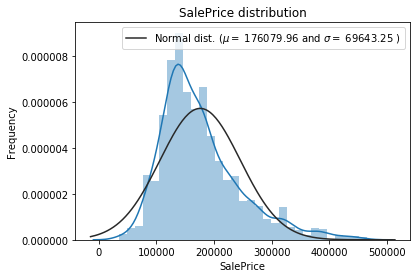

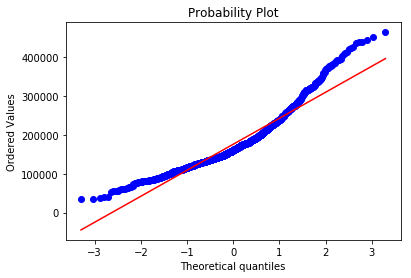

In [1790]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(train_df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)
plt.show()

There is some skew to SalesPrice that can be fixed using logs so I will go ahead and fix that by using this code below. If I were to enable this, it would mean I would have to adjust my predicted values at the end when I submit

In [1791]:
#train_df.SalePrice = np.log1p(train_df.SalePrice )
#y = train_df.SalePrice

In [1792]:
#skewness test to see if maybe some of the data needs to be resized using logs for example
from scipy.stats import skew 
skewness = train_num.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF     9.002080 
KitchenAbvGr     4.483784 
BsmtFinSF2       4.250888 
ScreenPorch      4.117977 
BsmtHalfBath     4.099186 
EnclosedPorch    3.086696 
MasVnrArea       2.674865 
OpenPorchSF      2.361912 
LotFrontage      2.271304 
BsmtFinSF1       1.683771 
WoodDeckSF       1.539792 
TotalBsmtSF      1.522688 
MSSubClass       1.406210 
1stFlrSF         1.375342 
GrLivArea        1.365156 
BsmtUnfSF        0.919323 
2ndFlrSF         0.812194 
OverallCond      0.692355 
TotRmsAbvGrd     0.675646 
HalfBath         0.675203 
Fireplaces       0.648898 
BsmtFullBath     0.595454 
OverallQual      0.216721 
MoSold           0.211835 
BedroomAbvGr     0.211572 
GarageArea       0.179796 
YrSold           0.096170 
FullBath         0.036524 
Id               0.000000 
GarageCars      -0.342197 
YearRemodAdd    -0.503044 
YearBuilt       -0.612831 
GarageYrBlt     -0.677636 
d

I'm not too worried about this as my correlation tests showed none of the features with very high skew to be the top correlated features with SalePrice so I will leave this for now

# Feature engineering? resizing?
Something I can come back and consider doing is feature engineering or combining all the square footage measurements into one overarching feature. If my RMSE is way off I can come back and do this. I could also consider creating features like baths squared but I will do a take on that with a polynomial elastic net regression. I will just focus on resizing my data for now and creating dummy variables

### Transforming categorical variables into numerical through dummies
I'm going to try and treat categorical and ordinal as just categorical variables for now

In [1793]:
#can I separate cateogorical from numerical using dtype? Yes it appears so from below
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1405 entries, 0 to 1459
Data columns (total 77 columns):
Id               1405 non-null int64
MSSubClass       1405 non-null int64
MSZoning         1405 non-null object
LotFrontage      1405 non-null float64
LotArea          1405 non-null int64
Street           1405 non-null object
LotShape         1405 non-null object
LandContour      1405 non-null object
Utilities        1405 non-null object
LotConfig        1405 non-null object
LandSlope        1405 non-null object
Neighborhood     1405 non-null object
Condition1       1405 non-null object
Condition2       1405 non-null object
BldgType         1405 non-null object
HouseStyle       1405 non-null object
OverallQual      1405 non-null int64
OverallCond      1405 non-null int64
YearBuilt        1405 non-null int64
YearRemodAdd     1405 non-null int64
RoofStyle        1405 non-null object
RoofMatl         1405 non-null object
Exterior1st      1405 non-null object
Exterior2nd      1405 non

In [1794]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000
mean,729.301068,57.188612,68.705369,9434.563701,6.064057,5.580783,1971.119573,1984.691103,98.140925,424.985053,45.161566,564.145907,1034.292527,1141.913879,340.054093,5.387189,1487.355160,0.413523,0.056228,1.550890,0.380071,2.856940,1.046975,6.460498,0.587900,1978.525979,1.745907,465.612100,91.289680,45.413523,21.585765,3.543060,14.437011,1.765836,44.337367,6.345196,2007.812811,176079.961566
std,422.623186,42.373030,18.771120,3513.002599,1.346155,1.111991,30.239852,20.669216,169.864505,417.852511,158.252175,436.487197,392.561602,354.103071,425.744175,46.052285,478.091786,0.509695,0.236544,0.538815,0.502871,0.808715,0.221526,1.571890,0.626114,23.961601,0.741663,207.850126,120.596804,64.777753,59.153892,29.878131,54.316667,33.347262,505.225376,2.700055,1.325772,69668.049813
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,364.000000,20.000000,60.000000,7449.000000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,0.000000,224.000000,793.000000,874.000000,0.000000,0.000000,1123.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,315.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129000.000000
50%,729.000000,50.000000,69.766667,9317.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,375.000000,0.000000,476.000000,980.000000,1077.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,474.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,1094.000000,70.000000,79.000000,11287.000000,7.000000,6.000000,2000.000000,2004.000000,160.000000,697.000000,0.000000,803.000000,1268.000000,1362.000000,727.000000,0.000000,1752.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,208900.000000
max,1460.000000,190.000000,138.000000,23595.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,1880.000000,1474.000000,2336.000000,2524.000000,2898.000000,1818.000000,528.000000,3493.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1248.000000,736.000000,547.000000,386.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,465000.000000


In [1795]:
train_df.shape

(1405, 77)

In [1796]:
test_df.shape

(1459, 76)

In [1797]:
#defining my y variable
y = train_df.SalePrice

In [1798]:
#combining the test and train datasets for creating dummy variables
whole_dataset = pd.concat([train_df,test_df],axis=0)
whole_dataset.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,0,2,CollgCr,61,5,7,Y,0,CompShg,Gable,Normal,208500.0,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,0,5,Veenker,0,8,6,Y,0,CompShg,Gable,Normal,181500.0,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,0,9,CollgCr,42,5,7,Y,0,CompShg,Gable,Normal,223500.0,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,Gd,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,0,2,Crawfor,35,5,7,Y,0,CompShg,Gable,Abnorml,140000.0,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,TA,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,0,12,NoRidge,84,5,8,Y,0,CompShg,Gable,Normal,250000.0,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [1799]:
#separating out the categorical and numerical features
categorical_features = whole_dataset.select_dtypes(include = ["object"]).columns
numerical_features = whole_dataset.select_dtypes(exclude = ["object"]).columns

whole_num = whole_dataset[numerical_features]
whole_cat = whole_dataset[categorical_features]


In [1800]:
#creating the dummies for the category dataframe and combining it with the numerical dataframe
whole_cat = pd.get_dummies(whole_cat)
whole_dataset = pd.concat([whole_cat,whole_num],axis=1)
whole_dataset.head()
#SalePrice is still in there so I'm going to drop it
whole_dataset = whole_dataset.drop(["SalePrice"], axis=1)
whole_dataset.shape

(2864, 284)

In [1801]:
#scale the dataset before breaking it up
from sklearn.preprocessing import MinMaxScaler, StandardScaler
min_max = MinMaxScaler()
index = whole_dataset.Id
whole_dataset = whole_dataset.drop(["Id"], axis=1)
whole_dataset = min_max.fit_transform(whole_dataset)
whole_dataset = pd.DataFrame(whole_dataset)


In [1802]:
#now to break them out into test and train datasets again
standard_train = whole_dataset.iloc[:1405, ]
standard_test = whole_dataset.iloc[1405:, ]
#to make sure it all looks good I'll just peek at the dataframes
standard_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282
1405,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.118042,0.000000,0.0,0.250,0.116708,0.094364,0.0,0.0,0.115582,0.0,0.00,0.25,0.490591,0.2,0.211538,0.118042,0.0,0.333333,0.186655,0.329609,0.0,0.000000,0.0000,0.000000,0.454545,0.000000,0.625,0.444444,0.0,0.208333,0.230769,0.173111,0.098315,0.644928,0.183333,1.0
1406,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.208990,0.000000,0.0,0.375,0.230175,0.000000,0.0,0.0,0.173801,0.0,0.00,0.25,0.209677,0.2,0.201923,0.208990,0.5,0.333333,0.234485,0.335196,0.0,0.000000,0.0675,0.735294,0.454545,0.048518,0.625,0.555556,0.0,0.000000,0.307692,0.260844,0.275983,0.623188,0.133333,1.0
1407,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [1803]:
standard_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.109641,0.458647,0.0,0.375,0.176060,0.0,0.333333,0.0,0.064212,0.000000,0.00,0.50,0.368280,0.4,0.346154,0.289015,0.5,0.333333,0.129295,0.245810,0.0,0.235294,0.12250,0.0,0.090909,0.082210,0.500,0.666667,0.0,0.0,0.461538,0.168008,0.000000,0.949275,0.883333,0.50
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.194917,0.000000,0.0,0.375,0.243890,0.0,0.000000,0.5,0.121575,0.000000,0.25,0.50,0.309140,0.4,0.259615,0.194917,0.0,0.333333,0.150090,0.329609,0.0,0.000000,0.00000,0.0,0.363636,0.000000,0.875,0.555556,0.0,0.0,0.307692,0.247694,0.209270,0.753623,0.433333,0.25
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0

In [1804]:
#now to break them out into test and train datasets again (previous way of doing it)
#train = whole_dataset[whole_dataset.Id<1461]
#test = whole_dataset[whole_dataset.Id>1460]

In [1805]:
standard_test.shape

(1459, 283)

In [1806]:
standard_train.shape

(1405, 283)

both test and train sets have the same amount of columns which is something I was having trouble with for a while

In [1807]:
# OLD WAY (IGNORE) Decided to use the Standard Scaler to center the mean around 0 and a standard deviation of 1, will print out to make sure it worked
#scaler = StandardScaler()
#scaler.fit(train)
#standard_test = scaler.transform(train)
#print(np.mean(standard_train, 0))
#print(np.std(standard_train, 0))

#Standardizing the test dataset too
#scaler = StandardScaler()
#scaler.fit(test)
#standard_test = scaler.transform(test)

In [1808]:
#OLD IGNORE
#min_max = MinMaxScaler()
#standard_test = min_max.fit_transform(test)
#standard_train = min_max.fit_transform(train)

#standard_train = pd.DataFrame(standard_train)
#standard_test = pd.DataFrame(standard_test)
#standard_train.head()

I'm almost ready to start modeling, I just want to take a look at the relevant variables again

# Premodeling analysis and visualization

before I begin my models, I wanted to gauge manually which variables are highly correlated with Sale Price before I go in so I know kind of what to expect. 

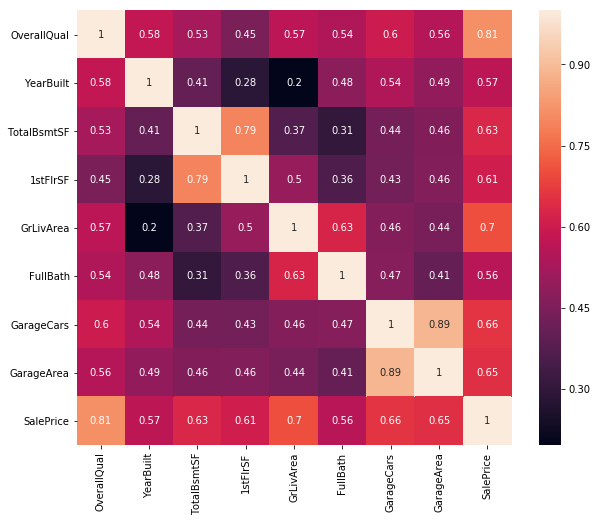

In [1809]:
correlation_sp = train_df.corr()
SalePriceCorr = correlation_sp.index[abs(correlation_sp['SalePrice'])>.55]
f, ax=plt.subplots(figsize=(10,8))
sns.heatmap(train_df[SalePriceCorr].corr(), square=True, annot=True)

In [1810]:
#Same thing as above but in a more readable format
corr = train_df.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

SalePrice        1.000000
OverallQual      0.813379
GrLivArea        0.703051
GarageCars       0.659975
GarageArea       0.649823
TotalBsmtSF      0.630106
1stFlrSF         0.607237
YearBuilt        0.570682
FullBath         0.562998
YearRemodAdd     0.546153
TotRmsAbvGrd     0.507159
GarageYrBlt      0.506298
Fireplaces       0.456276
MasVnrArea       0.439947
LotArea          0.399409
LotFrontage      0.377993
BsmtFinSF1       0.374727
OpenPorchSF      0.335029
WoodDeckSF       0.328234
2ndFlrSF         0.291574
HalfBath         0.284453
BsmtFullBath     0.227342
BsmtUnfSF        0.218110
BedroomAbvGr     0.162571
ScreenPorch      0.088765
MoSold           0.073718
3SsnPorch        0.060085
PoolArea         0.034216
Id              -0.019260
MiscVal         -0.020206
BsmtFinSF2      -0.027975
YrSold          -0.035179
BsmtHalfBath    -0.035487
LowQualFinSF    -0.065951
MSSubClass      -0.081274
OverallCond     -0.082790
KitchenAbvGr    -0.144596
EnclosedPorch   -0.160142
Name: SalePr

It looks like the key features are going to be: OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd. So it seems like overall squarefootage will be important along with the overall quality of the house, and baths. I could use these features as specifics for a linear regression if I wanted but I feel a linear regression won't be accurate by itself so I won't spend the time on this assignment.

# Modeling

In [1811]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns

In [1812]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [1813]:
#in preparation for some of my modeling I want to break up my standardized test data to be able to evaluate the performance of my tests
X_train,X_test,y_train,y_test = train_test_split(standard_train,y,test_size = 0.3,random_state= 42)

In [1814]:
#Here is a linear regression model
linear_regression_model = SGDRegressor(tol=.0001, eta0=.01)
linear_regression_model.fit(standard_train, y)
predictions = linear_regression_model.predict(standard_train)
mse = mean_squared_error(y, predictions)
print("RMSE: {}".format(np.sqrt(mse)))

RMSE: 17880.640644347328


In [1815]:
submit = pd.DataFrame({'SalePrice':predictions})
submit = pd.concat([test_df.Id,submit],axis=1)
type(submit.Id)
submit.to_csv("submission.csv",index=False)

This linear regression seems to have worked okay but lets try some other linear regressions with a random search for the best hyperparameters

In [1816]:
#I'm going to do a random search first to find the best eta
from sklearn.model_selection import RandomizedSearchCV

param_dist = {"eta0": [ .001, .003, .01, .03, .1, .3, 1, 3], 'tol' : [.1, .01, .001, 0.0001]}

linear_regression_model = SGDRegressor()

n_iter_search = 8
random_search = RandomizedSearchCV(linear_regression_model, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

print("Best Parameters: {}".format(random_search.best_params_))
print("Best Negative MSE: {}".format(random_search.best_score_))

Best Parameters: {'tol': 0.0001, 'eta0': 0.03}
Best Negative MSE: -458530107.79923916


now that I know my best eta and tol, Im going to use that below

In [1817]:
#lets try a linear regression with cross validation
linear_regression_model = SGDRegressor(tol=.0001, eta0=.03)
linear_regression_model.fit(X_train, y_train)
train_predictions = linear_regression_model.predict(X_train)
test_predictions = linear_regression_model.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Train RMSE: {}".format(np.sqrt(train_mse)))
print("Test RMSE: {}".format(np.sqrt(test_mse)))

Train RMSE: 16200.722204872127
Test RMSE: 21940.798829853782


In [1840]:
pipe = make_pipeline(linear_regression_model)
pipe.fit(x,y)
predictions = pipe.predict(standard_test)
submit = pd.DataFrame({'SalePrice':predictions})
submit = pd.concat([test_df.Id,submit],axis=1)
type(submit.Id)
submit.to_csv("submission25.csv",index=False)

This scored a 0.14280 which is good. Let's see if we can get this down though using some other techniques. Since the train has a lower RMSE than the test RMSE there is evidence of overfitting here. Since this has not worked very well so lets try some regularization models including first elastic net, and then lasso and ridge regressions. In these cases the use of alphas can help to prevent overfitting or high variance in our models. 

In [1818]:
from sklearn.linear_model import ElasticNetCV

# l1 ratio of zero is l2 and visa-versa 
# alphas are how much to weight regularization
clf = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=[.1, 1, 5, 9, 10])
clf.fit(X_train, y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)
print("Train RMSE: {}".format(np.sqrt(mean_squared_error(y_train, train_predictions))))
print("Test RMSE: {}".format(np.sqrt(mean_squared_error(y_test, test_predictions))))

Train RMSE: 15116.249034243743
Test RMSE: 21239.048113283658


In [1838]:
pipe = make_pipeline(clf)
pipe.fit(x,y)
predictions = pipe.predict(standard_test)

In [1839]:
submit = pd.DataFrame({'SalePrice':predictions})
submit = pd.concat([test_df.Id,submit],axis=1)
type(submit.Id)
submit.to_csv("submission3.csv",index=False)

This gave me a score of 0.14245 which is pretty good. This is still giving us evidence of high variance from overfitting on the train dataset. We know overall we have high bias as we can be more precise based on everyone else's answers. Lets try some other models including a model below that will do polynomials.

In [1819]:
#Elastic Net random search, I will use the found parameters in my regression coming up
param_dist = { 'alpha' : [.1, 1, 5, 9], 'l1_ratio' : [0.5, 0.3, 0.85]}

linear_regression_model = ElasticNet()

n_iter_search = 8
random_search = RandomizedSearchCV(linear_regression_model, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

print("Best Parameters: {}".format(random_search.best_params_))
print("Best Negative MSE: {}".format(random_search.best_score_))

Best Parameters: {'l1_ratio': 0.85, 'alpha': 0.1}
Best Negative MSE: -510661480.0305192


In [1820]:
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree = 2, include_bias = False)
xTrainPoly = poly2.fit_transform(X_train)
scaler = StandardScaler()
xTrainPolyStan = scaler.fit_transform(xTrainPoly)

# Fit the data
elasticReg = ElasticNet(alpha = 0.1, l1_ratio = 0.85)
elasticReg.fit(xTrainPolyStan, y_train)

# evaluate performance on training set
yTrainHat = elasticReg.predict(xTrainPolyStan)

# calculate rmse based on log(price)
mse = mean_squared_error(np.log(y_train), np.log(yTrainHat))
rmse = np.sqrt(mse)
print(rmse)

0.0021260408570064103


In [1821]:
xTestPoly = poly2.transform(standard_test)
xTestPolyStan = scaler.transform(xTestPoly)
yTestHat = elasticReg.predict(xTestPolyStan)
sub = pd.DataFrame()
sub['Id'] = test_df['Id']
sub['SalePrice'] = yTestHat
sub.to_csv('submission2.csv',index=False)

Above scored a 0.16282 which is okay but there is still some high bias, lets see if I can get that down through regularization. I will keep trying with the other regressions that will reduce overfitting and bias

In [1822]:
# Peforming Lasso and Ridge Regressions
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LinearRegression
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, train_test_split, learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

#libraries for cleaning data, imputing values
from sklearn.preprocessing import Imputer
import sklearn as sk

#silencing warnings and other rubbish
import warnings
warnings.filterwarnings("ignore")


#create a scoring method for our three models
def return_rmse(model, x, y):
    scores = np.sqrt(-cross_val_score(model, x, y, cv = 7, scoring = 'neg_mean_squared_error'))
    return scores.mean()

#Function from sklearn for plotting learning curves and model results
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'neg_mean_squared_error')
    
    train_scores_mean = np.mean(np.sqrt(-train_scores), axis=1)
    train_scores_std = np.std(np.sqrt(-train_scores), axis=1)
    test_scores_mean = np.mean(np.sqrt(-test_scores), axis=1)
    test_scores_std = np.std(np.sqrt(-test_scores), axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [1823]:
x = standard_train

In preparation for lasso and ridge regressions I'm going to do a random search for the best parameters starting with bayesian ridge

In [1831]:
#Bayesian Ridge Random Search, I will use the found parameters in my regression coming up
param_dist = { 'tol' : [.1, .01, .001, 0.0001, 0.00001], 'n_iter' : [300, 500, 600, 700, 800]}

linear_regression_model = BayesianRidge()

n_iter_search = 8
random_search = RandomizedSearchCV(linear_regression_model, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

print("Best Parameters: {}".format(random_search.best_params_))
print("Best Negative MSE: {}".format(random_search.best_score_))

Best Parameters: {'tol': 1e-05, 'n_iter': 800}
Best Negative MSE: -418305449.91791457


In [1827]:
#Lasso Random Search, I will use the found parameters in my regression coming up
param_dist = { 'tol' : [.1, .01, .001, 0.0001], 'alpha' : [0.5, 1, 5, 9, 9.5]}

linear_regression_model = Lasso()

n_iter_search = 8
random_search = RandomizedSearchCV(linear_regression_model, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

print("Best Parameters: {}".format(random_search.best_params_))
print("Best Negative MSE: {}".format(random_search.best_score_))

Best Parameters: {'tol': 0.001, 'alpha': 9.5}
Best Negative MSE: -414506265.6444988


I chose the option of a really high alpha in the random search since I have so many variables in my dataset

Lasso : RMSE = 19536.13030701566


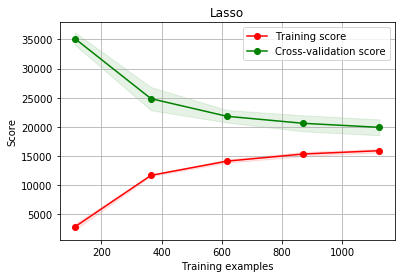

BayesianRidge : RMSE = 19804.52648431628


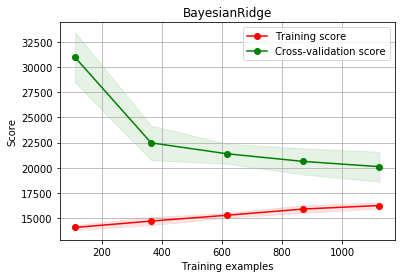

In [1833]:
lr = Lasso(alpha = 9.5, tol = 0.001, max_iter=1500)
br = BayesianRidge(n_iter=800, tol=0.00001)
modeltypes = [lr, br]
for model in modeltypes:
    scores = return_rmse(model, x, y)
    print(model.__class__.__name__,": RMSE =", scores)
    plot_learning_curve(model, model.__class__.__name__, x, y, cv = 5)
    plt.show()

There is not too high variance in these models so lets try the lasso in Kaggle to see our bias

In [1836]:
pipe = make_pipeline(lr)
pipe.fit(x,y)
predictions = pipe.predict(standard_test)


In [1837]:
submit = pd.DataFrame({'SalePrice':predictions})
submit = pd.concat([test_df.Id,submit],axis=1)
type(submit.Id)
submit.to_csv("submission4.csv",index=False)

This lasso model scores a 0.14192, which is my best and what I will keep as my high score. It was interesting though because I only dropped outliers after I first ran my models. Before I dropped my outliers my high score on Kaggle was a 0.1705 but with dropping outliers I improved by about 0.03 which is great! I think my final model was useful. Obviously there is room for work to be done but with some fine tuning this model could be great resources. This model is more suited for middle class homes because the dataset had an average house price of $180,000. This model would not work so well in very affluent areas so has limited usefulness. It seems that people care about the overall quality and condition of the house a lot along with the square footage and age of the house. An interesting feature of note is the presence and size of the garage. This may not be a causal mechanism because presence of and size of a garage is often correlated with simply larger houses which inherintly go for higher prices. I was able to overcome the high variance issues present in my linear regression by switching to regularization models to penalize based on the number of coefficients used and this produced results with lower variance. There is still some presence of high bias that can come from better handling the missing values that were in the dataset earlier on. 

More specifically, for modeling we will look for:

Model Selection: Did you try multiple models? Why did you choose these models? How do they work? What are they assumptions? And how did you test/account for them? How did you select hyper-parameters?

Model interpretation: What do the model results tell you? Which variables are important? High bias or variance and how did you / could you fix this? How confident are you in your results?

Model usefulness: Do you think your final model was useful? If so, how would you recommend using it? Convince us, that if we were a company, we would feel comfortable using your model with our users. Think about edge cases as well - are there certain areas that the model performs poorly on? Best on? How would you handle these cases, if say Zillow wanted to leverage your model realizing that bad recommendations on sale prices would hurt customer trust and your brand. This section also falls into the storytelling aspect of the grading.